# Unsupervised Learning with Scikit-Learn

## Lesson Goals

This lesson will serve as an introduction to unsupervised learning using Scikit-learn. A number of essential algorithms will be covered along with implementation and examples.


## Introduction

Clustering is a family of algorithms for uncovering relationships and insight in a dataset. The data is not labeled and so there is no ground truth answer that we are trying to predict. Instead, we use different algorithms to group observations together and uncover what they might have in common. There are multiple clustering techniques. In this lesson we will cover two clustering techniques - K-means and Hierarchical Clustering.


## K-means

K-means is one of the oldest and most popular clustering techniques. The main idea behind k-means clustering is that we choose how many clusters we would like to create (typically we call that number k). We then select random starting points for those cluster centroids. We compute the distance between each observation and the clusters. We reassign a cluster to each observation and then recompute the centroids. We keep doing so until the labels stay constant and we no longer need to reassign.


## K-means in Scikit-Learn

We will explore k-means with scikit-learn using our census data. We first load the data. 

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

census = pd.read_csv('/Users/work/Documents/DSML25/week_5/5.2.lab-unsupervised-learning-en/data/acs2015_county_data.csv')
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


Before using our algorithm, we need to do some munging. Our first step should be to check for missing data and based on the amount of missing data decide on a strategy.

In [14]:
census.isnull().sum(axis = 0)

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

There are only a few columns with missing data and each one of them does not have more than one missing observation. Therefore, the simplest strategy would be to remove the missing data.

In [15]:
census_missing = census.dropna()

Additionally, we should only be clustering using columns that contain actual information about the data. Therefore, we should probably remove the State and County columns. We should also remove the CensusId column because it contains no information about the each county.

In [16]:
census_columns = [col for col in census.columns.values if col not in ['CensusId', 'State', 'County']]

Now let's import Kmeans from scikit-learn: 

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

We define a k-means object with 4 clusters and then fit our data

In [18]:
census_clusters = kmeans.fit(census_missing[census_columns])
census_clusters.cluster_centers_

array([[7.14995000e+05, 3.48954639e+05, 3.66040361e+05, 1.67854430e+01,
        6.02544304e+01, 1.41050633e+01, 3.38607595e-01, 5.71392405e+00,
        1.68354430e-01, 4.95983386e+05, 6.12043038e+04, 8.54474684e+02,
        3.16039367e+04, 3.98056962e+02, 1.41791139e+01, 1.99753165e+01,
        3.92006329e+01, 1.76835443e+01, 2.45822785e+01, 8.00569620e+00,
        1.05272152e+01, 7.64436709e+01, 9.11392405e+00, 5.50126582e+00,
        2.59430380e+00, 1.83607595e+00, 4.50379747e+00, 2.63639241e+01,
        3.41134006e+05, 8.07563291e+01, 1.36443038e+01, 5.46392405e+00,
        1.39240506e-01, 8.22974684e+00],
       [4.86137678e+04, 2.40621967e+04, 2.45515711e+04, 1.05567434e+01,
        7.64794408e+01, 8.35263158e+00, 1.80161184e+00, 9.32302632e-01,
        6.60197368e-02, 3.59949480e+04, 4.52585901e+04, 2.96736349e+03,
        2.35332332e+04, 1.41598651e+03, 1.76663816e+01, 2.44105263e+01,
        3.05263158e+01, 1.83702632e+01, 2.20742434e+01, 1.29949671e+01,
        1.60345066e+01,

The cluster centers contain the 4 centroids. Since the data contains 34 columns describing each county, each centroid is in a 34 dimensional plane.

Using fit_predict, we can assign a cluster to each observation and then add this information back to our dataset. 

In [19]:
census_missing['Cluster'] = census_clusters.fit_predict(census_missing[census_columns])

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_71781/532130096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_missing['Cluster'] = census_clusters.fit_predict(census_missing[census_columns])


Let's look at the counts of counties in each cluster:

In [20]:
census_missing.Cluster.value_counts()

Cluster
0    3045
2     154
1      18
3       1
Name: count, dtype: int64

The majority of the data is in the first cluster, while cluster 2 has only one obervation.

Plotting the data will not provide us with a great deal of meaningful information. This is because the data has 34 dimensions. Therefore, creating a two dimensional plot will only capture some of the information and might not show completely separable clusters. However, it is interesting to look at some summary statistics for our clusters.

We can look at the count of counties by state for each cluster

In [21]:
census_missing[census_missing.Cluster == 0].State.value_counts()

State
Texas             241
Georgia           155
Virginia          130
Kentucky          119
Missouri          113
Kansas            103
Iowa               98
North Carolina     97
Illinois           97
Tennessee          92
Nebraska           92
Indiana            90
Minnesota          84
Mississippi        82
Ohio               82
Michigan           78
Puerto Rico        78
Oklahoma           75
Arkansas           74
Wisconsin          69
South Dakota       66
Alabama            65
Louisiana          62
Colorado           59
Pennsylvania       58
Montana            56
West Virginia      55
Florida            53
North Dakota       53
New York           51
South Carolina     44
Idaho              43
California         37
Washington         34
Oregon             33
New Mexico         32
Alaska             29
Utah               27
Wyoming            23
Maryland           19
Maine              16
Nevada             15
Vermont            14
Arizona            13
New Jersey         10
New 

In [22]:
census_missing[census_missing.Cluster == 1].State.value_counts()

State
California    5
Texas         4
Florida       2
New York      2
Arizona       1
Illinois      1
Michigan      1
Nevada        1
Washington    1
Name: count, dtype: int64

In [23]:
census_missing[census_missing.Cluster == 2].State.value_counts()

State
California              15
Florida                 12
New Jersey              11
New York                 9
Pennsylvania             9
Texas                    8
Massachusetts            8
Ohio                     6
Maryland                 5
Colorado                 5
Illinois                 4
Michigan                 4
Georgia                  4
Washington               4
Oregon                   3
North Carolina           3
Tennessee                3
Virginia                 3
Minnesota                3
Wisconsin                3
Connecticut              3
Louisiana                2
Kansas                   2
Utah                     2
South Carolina           2
Indiana                  2
Oklahoma                 2
Missouri                 2
Alabama                  2
New Mexico               1
Kentucky                 1
Iowa                     1
New Hampshire            1
Arizona                  1
Idaho                    1
Hawaii                   1
Rhode Island          

In [24]:
census_missing[census_missing.Cluster == 3].State.value_counts()

State
California    1
Name: count, dtype: int64

We can also look at the mean income and the mean rate of child poverty for each of the 4 clusters.



In [25]:
census_missing.groupby(['Cluster'])['Income'].mean()

Cluster
0    45264.092282
1    57796.500000
2    61688.987013
3    56196.000000
Name: Income, dtype: float64

In [26]:
census_missing.groupby(['Cluster'])['ChildPoverty'].mean()

Cluster
0    24.418030
1    23.527778
2    19.712987
3    25.800000
Name: ChildPoverty, dtype: float64

# Hierarchical Clustering

Hierarchical clustering is a clustering technique where we create a hierarchy of clusters. The advantage over k-means is that we do not need to specify the number of clusters. We can observe relationships between observations without a predetermined number of clusters. We can also generate a dendogram which is a visualization that displays the relationship between observations in the data.

There are two types of hierarchical clustering

    Agglomerative - This is a bottom up approach. We start off with a cluster for each observation and 
    then combine similar clusters until we are left with only one large cluster

    Divisive - This is a top down approach. We start with one large cluster and keep dividing until 
    we are left with clusters

**Hierarchical Clustering with Scikit-learn**

Hierarchical clustering with scikit-learn is performed using the AgglomerativeClustering function.

In order to demonstrate hierarchical clustering, we will use the census data again. This time, we will take a sample to ensure a clear and uncluttered dendogram just for the sake of this demo.

In [27]:
from sklearn.cluster import AgglomerativeClustering

census_sample = census_missing[census_columns].sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
census_hier = hier_clust.fit(census_sample)

In order to plot our dendogram, we need to do some data manipulation. This is because the function to plot a dendogram exists in scipy and not in scikit-learn and requires a slightly different data format.

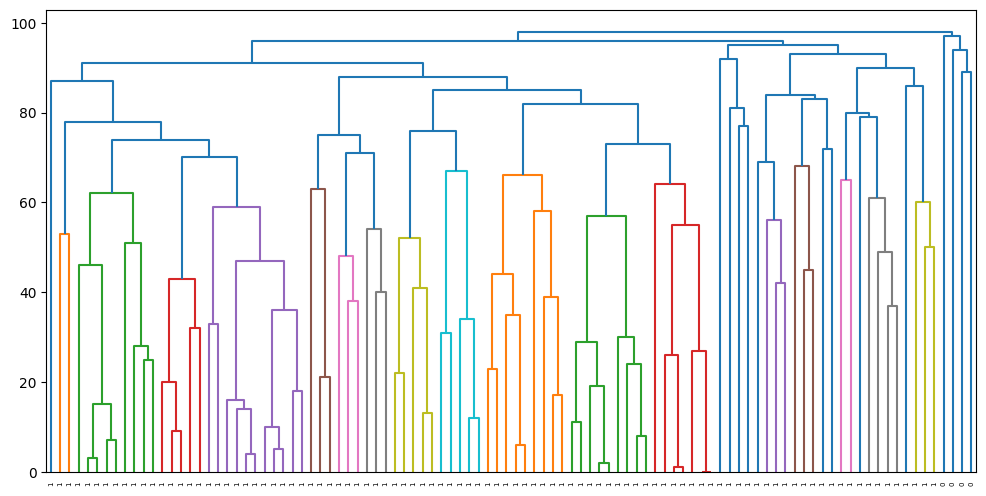

In [28]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=(12,6))
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(census_hier, labels=census_hier.labels_)